In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# --------------------------------------------------------------------
# 📂 공용 라이브러리 로드 (Load Shared Library)
# --------------------------------------------------------------------
try:
    sys.path.append(os.path.abspath('../../01_Shared_Lib'))
    import constants as config
    import barh_plot as hbar
    print(f'📚 Shared Library Loaded: {config.__name__}')
except ImportError:
    print('⚠️ constants.py를 찾을 수 없습니다. (경로 확인 필요)')

# --------------------------------------------------------------------
# 🎨 한글 폰트 및 시각화 설정 (Korean Font & Visualization Settings)
# --------------------------------------------------------------------
if os.name == 'nt': # Windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix': # Mac
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 6)   # 기본 도화지 크기 설정

print('✅ Data Analysis Environment Initialized!')

📚 Shared Library Loaded: constants
✅ Data Analysis Environment Initialized!


In [11]:
df = pd.read_csv('../../00_Common_Data/tbsh_gyeonggi_day_202507_이천시.csv')
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format='%Y%m%d')

df['day'] = df['day'].map(config.DAY_MAP)
df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['age'] = df['age'].map(config.AGE_MAP)

target_cols = ['cty_rgn_no', 'admi_cty_no', 'card_tpbuz_cd', 'card_tpbuz_nm_1', 'card_tpbuz_nm_2', 'sex', 'age', 'day', 'hour']
for col in target_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

print('✅ Data Settings Environment Initialized!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536716 entries, 0 to 536715
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ta_ymd           536716 non-null  datetime64[ns]
 1   cty_rgn_no       536716 non-null  category      
 2   admi_cty_no      536716 non-null  category      
 3   card_tpbuz_cd    536716 non-null  category      
 4   card_tpbuz_nm_1  536716 non-null  category      
 5   card_tpbuz_nm_2  536716 non-null  category      
 6   hour             536716 non-null  category      
 7   sex              536716 non-null  category      
 8   age              536716 non-null  category      
 9   day              536716 non-null  category      
 10  amt              536716 non-null  int64         
 11  cnt              536716 non-null  int64         
dtypes: category(9), datetime64[ns](1), int64(2)
memory usage: 16.9 MB
✅ Data Settings Environment Initialized!


C:\Users\owner\AppData\Local\Temp\ipykernel_10540\3146548222.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ymd_amount.index, y=ymd_amount.values, ax=ax1, alpha=0.7, palette=bar_color)
C:\Users\owner\AppData\Local\Temp\ipykernel_10540\3146548222.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(range(1,32))


Text(0.5, 0, '')

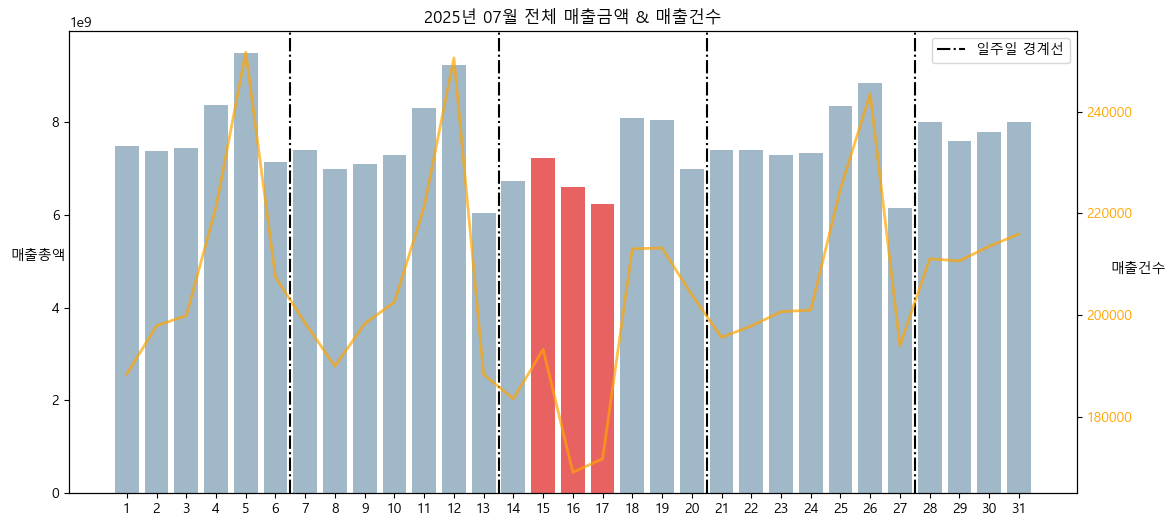

In [12]:
# 월 단위 분석:
## 이중 축 그래프 생성하기(7월 한달동안 전체 매출총액과 건수 확인)

#일 컬럼 생성
df['July_day'] = df['ta_ymd'].dt.day-1

## 매출금액 + 기준년월일 / 매출건수 + 기준년월일
ymd_amount = df.groupby('July_day')['amt'].sum()
ymd_count = df.groupby('July_day')['cnt'].sum()

#그림판(도화지) 제공
fig, ax1 = plt.subplots(figsize=(13,6))

## bar_color
for i in range(5,32,7):
  if i == 5:
     plt.axvline(x=i+0.5, color='black', linestyle='-.',label="일주일 경계선")
  else:
     plt.axvline(x=i+0.5, color='black', linestyle='-.')

plt.legend()
bar_color = ['#6f9dbd'] * len(ymd_amount.index)

bar_color[14] = 'red'
bar_color[15] = 'red'
bar_color[16] = 'red'
## bar
sns.barplot(x=ymd_amount.index, y=ymd_amount.values, ax=ax1, alpha=0.7, palette=bar_color)
ax1.set_xticklabels(range(1,32))

# 이중 축 (매출건수)
ax2 = ax1.twinx()

ax2.tick_params(axis='y', labelcolor='orange')
sns.lineplot(data = ymd_count, linewidth = 2, linestyle='-', ax=ax2, alpha=0.7, color='orange')
plt.title("2025년 07월 전체 매출금액 & 매출건수")
ax1.set_ylabel("매출총액", rotation=0, labelpad=10)
ax2.set_ylabel("매출건수", rotation=0)

ax1.set_xlabel("")

C:\Users\owner\AppData\Local\Temp\ipykernel_10540\1553670829.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_month = df.groupby('period')['amt'].sum()
C:\Users\owner\AppData\Local\Temp\ipykernel_10540\1553670829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_month.index, y=group_month.values/100000000, palette=bar_color)


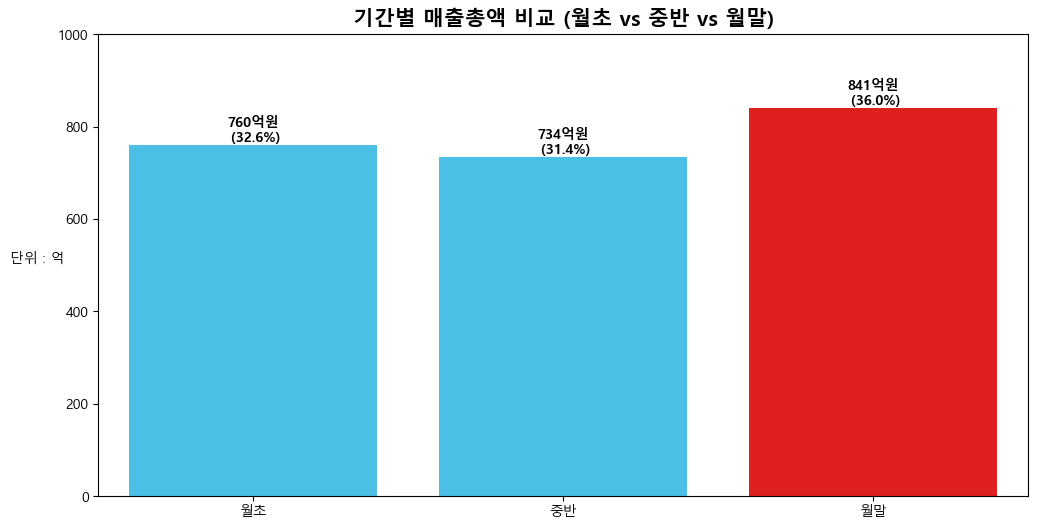

In [13]:
# 월초(1~10) 중반(11~20) 월말(21~31) 그룹 분포 / 현재 초복 있는 주가 적은건 더위때문인가 ? 월급날과 가깝기 때문인가 ?
cut_range = [0, 10, 20, 32]

x_label = ['월초', '중반', '월말']

df['period'] = pd.cut(df['ta_ymd'].dt.day, bins=cut_range, labels=x_label)

group_month = df.groupby('period')['amt'].sum()


fig, ax = plt.subplots(figsize=(12,6))

bar_color = ['#33cbff']*len(group_month.index)
bar_color[2] = 'red'

#1억으로 나눔
sns.barplot(x=group_month.index, y=group_month.values/100000000, palette=bar_color)

plt.title("기간별 매출총액 비교 (월초 vs 중반 vs 월말)", fontsize=15, weight='bold')
ax.set_xlabel("")
ax.set_ylabel("단위 : 억", rotation=0, labelpad = 15)
ax.set_ylim(0,1000)

for i, (index, value) in enumerate(group_month.items()):
    pct = (value/group_month.sum()) * 100
    text = f"{value/100000000:.0f}억원\n ({pct:.1f}%)"
    plt.text(x=i,y=value/100000000, s=text, ha='center', va='bottom', fontsize=10, weight='bold')

C:\Users\owner\AppData\Local\Temp\ipykernel_10540\1306796817.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_day = df.groupby('day')['cnt'].sum()
C:\Users\owner\AppData\Local\Temp\ipykernel_10540\1306796817.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=week_day.index,y=week_day.values, palette=bar_color, order=my_order, ax=ax)


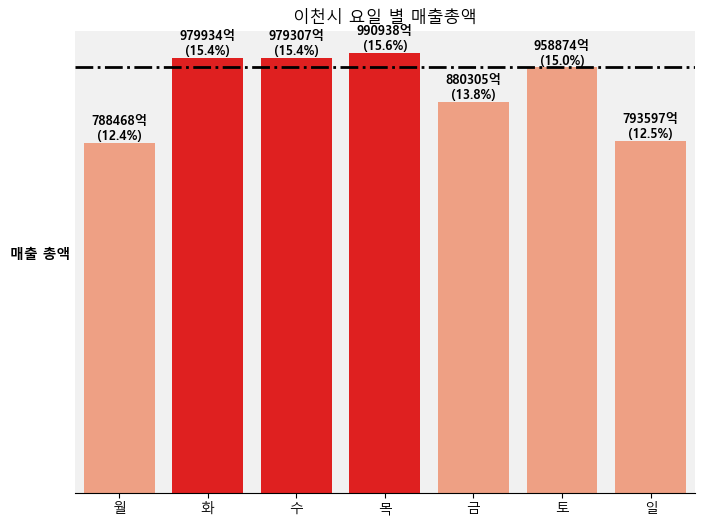

In [ ]:
import time

start_time = time.time() # 시작

# 주 단위 분석(월~일)
# 일주일 요일별 
week_day = df.groupby('day')['amt'].sum()

fig, ax = plt.subplots(figsize=(8,6))

my_order=['월','화','수','목','금','토','일']

bar_color = ['#ff9873'] * len(week_day.index)
bar_color[1] = 'red'
bar_color[2] = 'red'
bar_color[3] = 'red'
sns.barplot(x=week_day.index,y=week_day.values/100000000, palette=bar_color, order=my_order, ax=ax)

plt.title("이천시 요일 별 매출총액")
ax.set_ylabel("매출 총액", weight='bold', rotation=0, labelpad=25)
ax.set_xlabel("")
ax.set_ylim(200,400)
ax.set_yticks([])
ax.patch.set_facecolor("#f0f0f0ed")
ax.set_facecolor("#f0f0f0ed")

hline=week_day.loc['토']/100000000

plt.axhline(y=hline, linestyle="-.", linewidth=2, color='black')

for i, (index, value) in enumerate(week_day.reindex(my_order).items()):
    pct = (value/week_day.sum())*100
    text = f"{value/100000000:.0f}억\n({pct:.1f}%)"

    ax.text(x=i, y=value/100000000, s=text, ha='center', va='bottom', fontsize=9, weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible('black') 
ax.spines['left'].set_visible(False)

end_time = time.time() # 끝 도장 쾅

print(f"걸린 시간: {end_time - start_time:.4f} 초")
